# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

df = pd.read_csv(r"C:\Users\felip\OneDrive\Ebac\Descritiva 2\Profissão Cientista de Dados M10 A1.csv.csv")


In [2]:
df.dtypes

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

In [3]:
df['data_ref'] = pd.to_datetime(df['data_ref'])
df.dtypes

Unnamed: 0                        int64
data_ref                 datetime64[ns]
index                             int64
sexo                             object
posse_de_veiculo                   bool
posse_de_imovel                    bool
qtd_filhos                        int64
tipo_renda                       object
educacao                         object
estado_civil                     object
tipo_residencia                  object
idade                             int64
tempo_emprego                   float64
qt_pessoas_residencia           float64
mau                                bool
renda                           float64
dtype: object

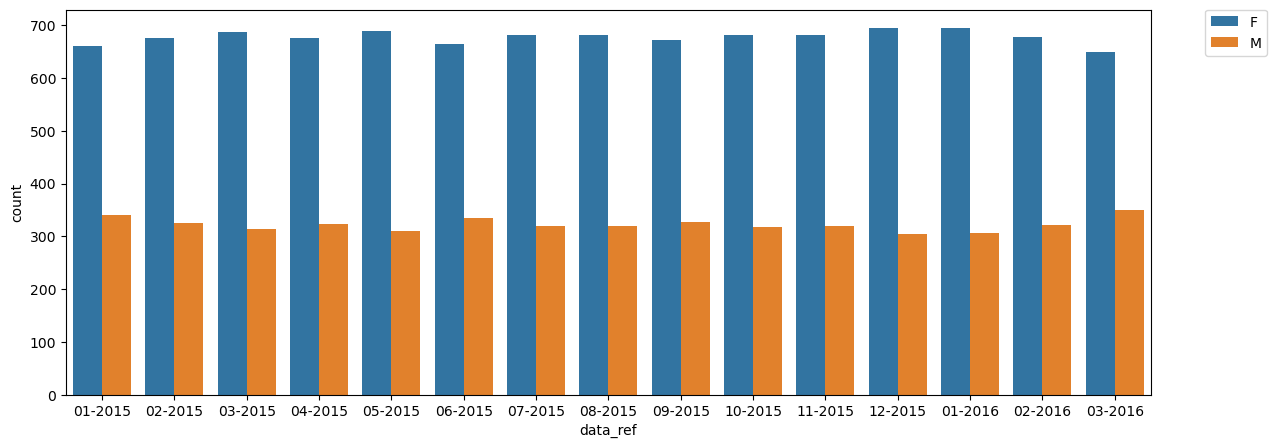

In [4]:
plt.figure(figsize=(14, 5))
ax = sns.countplot(x='data_ref',  hue = 'sexo', data=df)

tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()


ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [5]:
tab_porc = pd.crosstab(df['data_ref'],df['sexo'])
tab_porc.div(tab_porc.sum(axis = 1), axis = 0)

sexo,F,M
data_ref,,
2015-01-01,0.660,0.340
2015-02-01,0.675,0.325
2015-03-01,0.687,0.313
2015-04-01,0.676,0.324
2015-05-01,0.689,0.311
2015-06-01,0.665,0.335
2015-07-01,0.681,0.319
2015-08-01,0.681,0.319
2015-09-01,0.673,0.327


<Figure size 1400x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

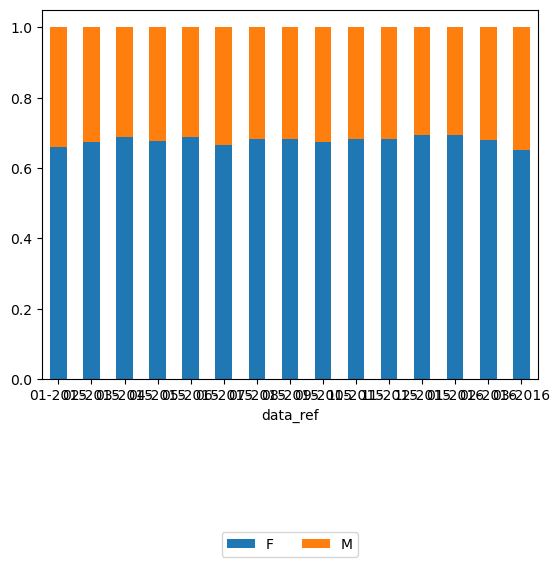

In [6]:
plt.figure(figsize=(14, 5))

tab_freq = pd.crosstab(df['data_ref'],df['sexo'])
tab = tab_freq.div(tab_porc.sum(axis = 1), axis = 0)

plt.figure(figsize=(20, 5))

ax = tab.plot.bar(stacked = True)

tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

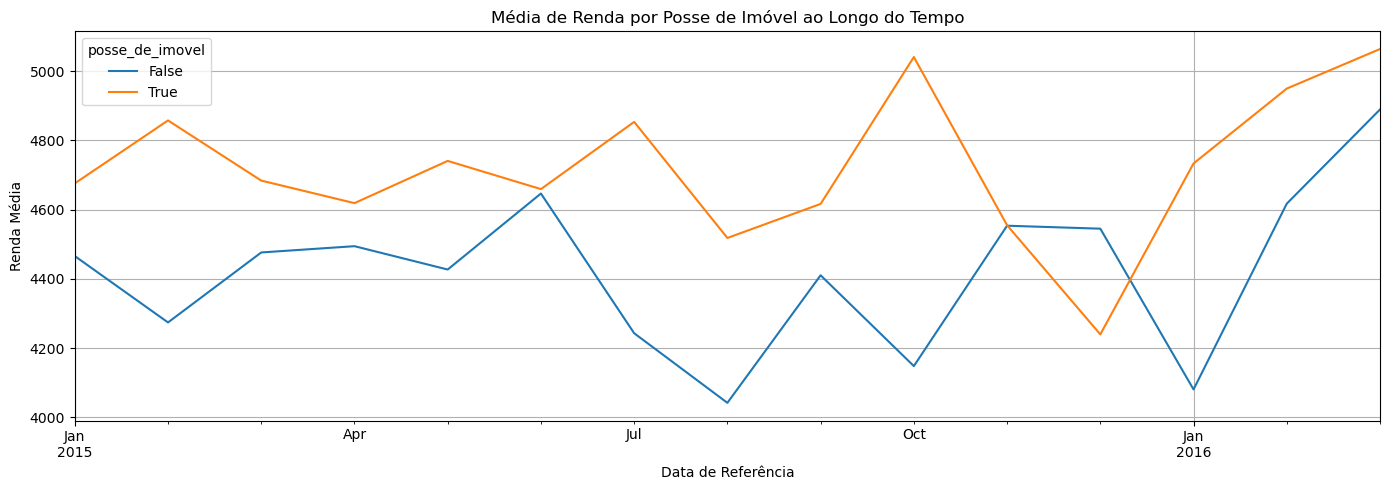

In [20]:
df.groupby(['data_ref', 'posse_de_imovel'])['renda'].mean().unstack().plot(figsize=(14,5))


plt.title("Média de Renda por Posse de Imóvel ao Longo do Tempo")
plt.ylabel("Renda Média")
plt.xlabel("Data de Referência")
plt.grid(True)
plt.tight_layout()
plt.show()



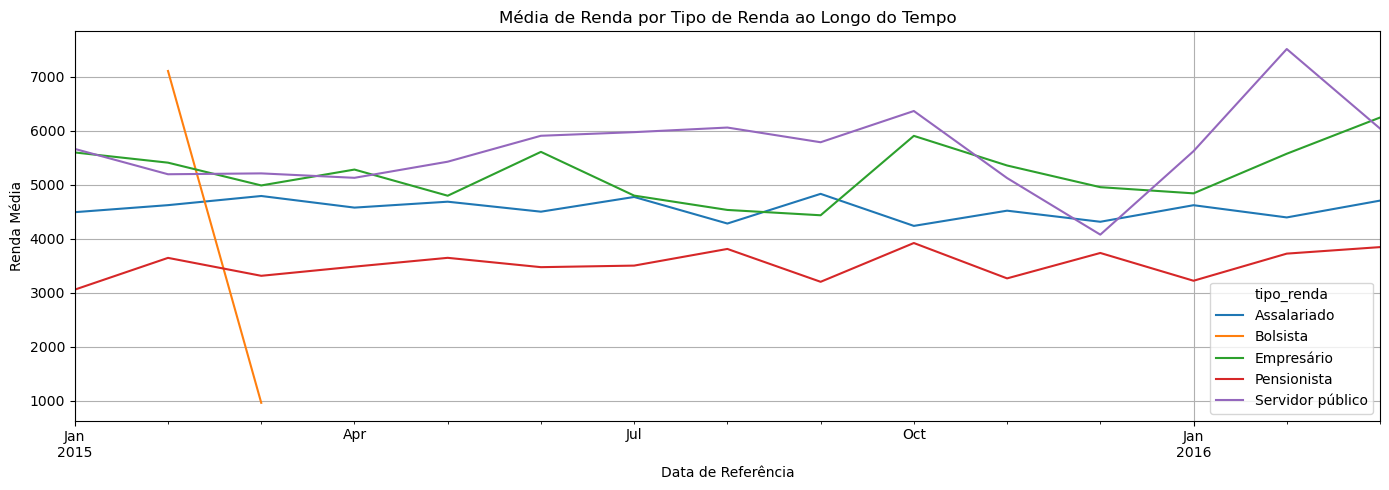

In [21]:
df.groupby(['data_ref', 'tipo_renda'])['renda'].mean().unstack().plot(figsize=(14,5))


plt.title("Média de Renda por Tipo de Renda ao Longo do Tempo")
plt.ylabel("Renda Média")
plt.xlabel("Data de Referência")
plt.grid(True)
plt.tight_layout()
plt.show()



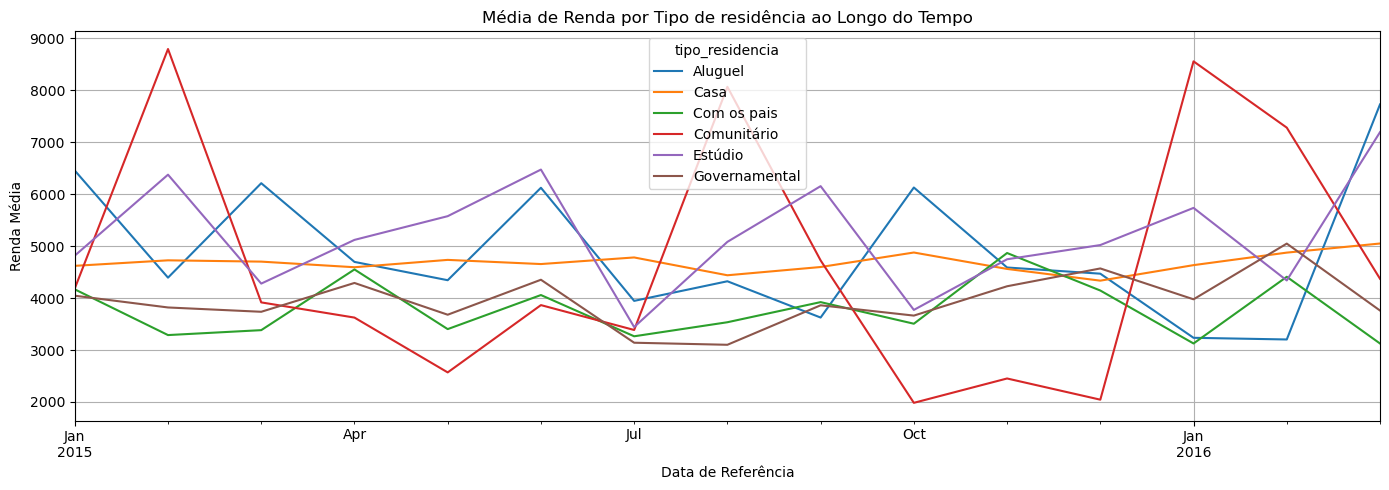

In [22]:
tab_renda = df.groupby(['data_ref', 'tipo_residencia'])['renda'].mean().unstack().plot(figsize=(14,5))

plt.title("Média de Renda por Tipo de residência ao Longo do Tempo")
plt.ylabel("Renda Média")
plt.xlabel("Data de Referência")
plt.grid(True)
plt.tight_layout()
plt.show()


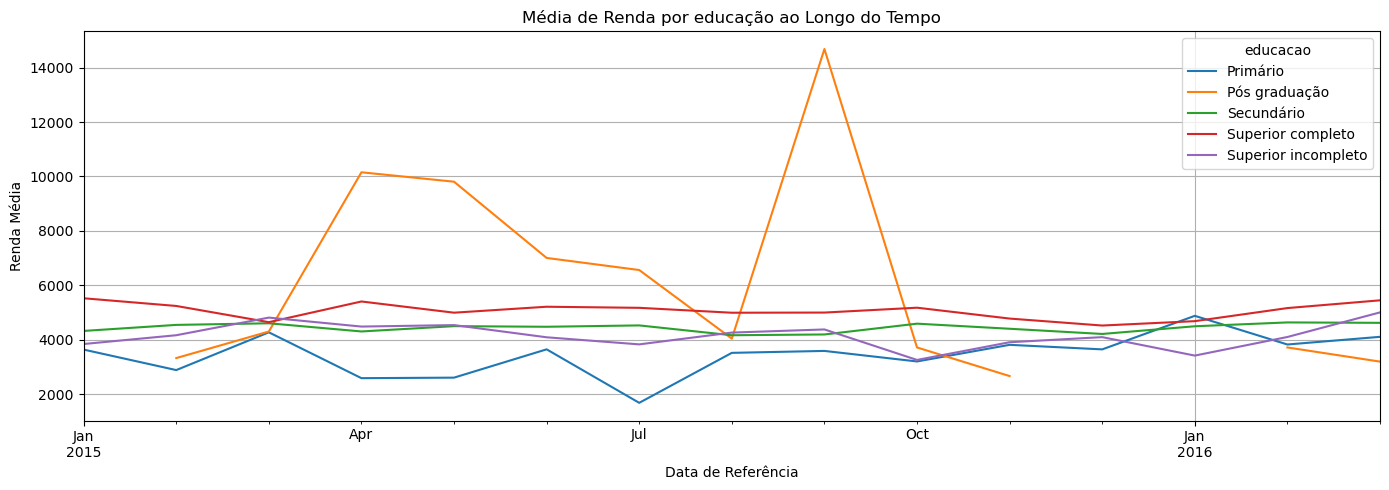

In [23]:
tab_renda = df.groupby(['data_ref', 'educacao'])['renda'].mean().unstack().plot(figsize=(14,5))

plt.title("Média de Renda por educação ao Longo do Tempo")
plt.ylabel("Renda Média")
plt.xlabel("Data de Referência")
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
df.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

Ao analisar a proporção de posse de imóvel, observamos que a média de renda de quem possui imóvel é maior do que de quem não possui. 

Para a variávetipo de renda, vemos que servidores e empresarios apresentam uma maior consistencia na alta da média da renda. o.

Já a variável tipo de renda apresentou maior instabilidade. As categorias se alternam bastante entre os meses, sem evidenciar um padrão claro ou comportamento previsível, o que sugere maior variabilidade dessa característica na base.